# Convolutional networks

One of the most popular type of neural networks.

Usually used for data processing.

Neurons are not connected to each pixel of image, but only to pixels in their perspective field.

They typically form a hierarchical structure.

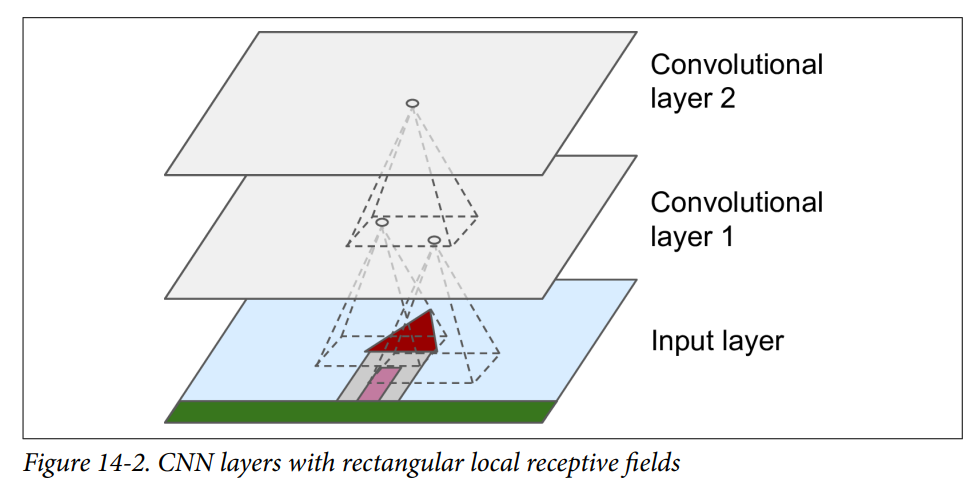

It can match patterns anywhere. 

Dense layer would need to learn a new pattern with new location. Dense layer is learning global pattern, CNN are learning local patterns.

CNN also have better understanding of spatial pattern hierarchies.

## Filters

Patch smaller than an input that interacts with patch size part of the input and by applying dot product (element-wise multiplication) produce scalar value.

Filter tries to detect specific feature of the input.

Sliding over input using filter results in **feature map**.

We than apply nonlienarity for example using **ReLu** on **feature map** and get the layer output.

During training network tries to find the most usefull filters and how to combine them in higher layers to capture complex patterns.

We just need to specify number of filters and their dimensions.

In [ ]:
import tensorflow as tf
# filter configuration is set in convolution layers in Keras
# by default Keras supports filters from 1D-3D

# example of defining 64 filters with dimensionality set to 3
tf.keras.layers.Conv1D(64, 3)
tf.keras.layers.Conv2D(64, (3, 3))
tf.keras.layers.Conv3D(64, (3, 3, 3))

## Strides 
Stride size used during filter slides. Results in downsampling the image. However, for this task is pooling used more often.

In [ ]:
# set stride to 3x3
tf.keras.layers.Conv2D(64, (3, 3), strides=3)

## Padding

How to handle input parts that do not fit when employing strides.

* **valid** means no padding - some of row and columns may be ignored
* **same** results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

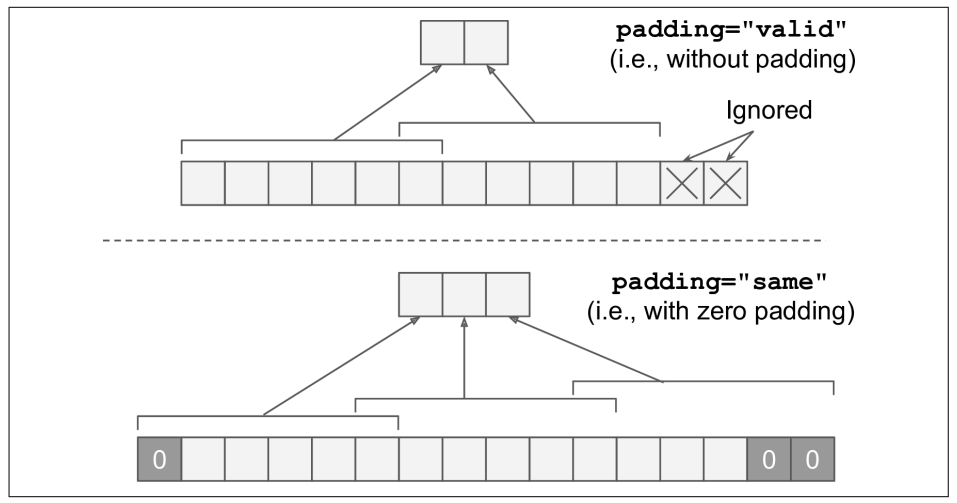

In [ ]:
# set padding to same
tf.keras.layers.Conv2D(64, (3, 3), strides=3, padding='same')
# set padding to valid
tf.keras.layers.Conv2D(64, (3, 3), strides=3, padding='valid')

## Pooling layers

Their goal is to shrink the input image in order to reduce the computational load, the memory usage, and the number of parameters.

Pooling layer also induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).

It also adds invariance to small translations.

### Max pooling
Propagates only the biggest value from patch.
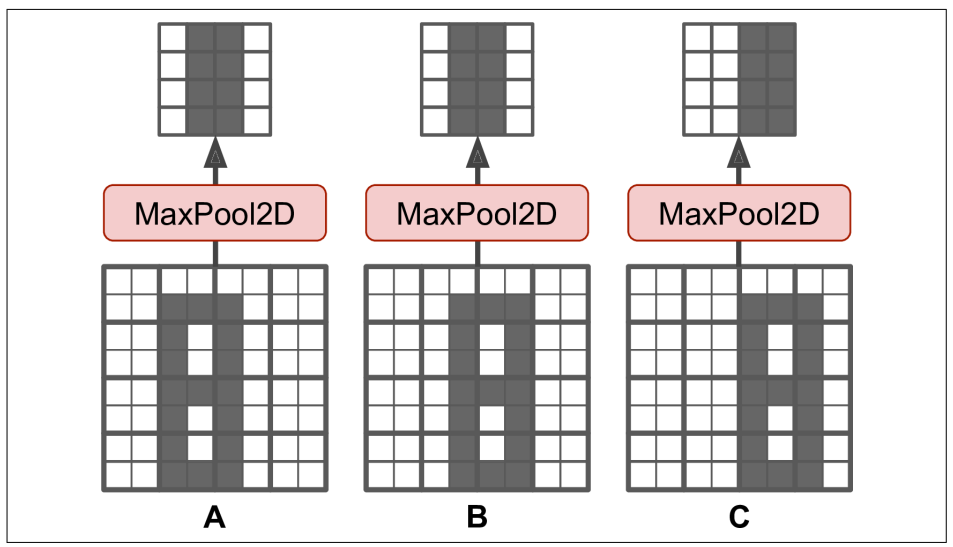

### Average pooling
Calculates average for patch.

### Global average pooling layer
Special type - calculates average across the whole feature map.

In [ ]:
# Keras by default supports 1-3 dimensionality for pooling layers
# pooling layers are in the layer namespace
tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid")
tf.keras.layers.AveragePooling2D (pool_size=(2, 2), strides=2, padding="valid")
tf.keras.layers.GlobalAveragePooling2D()

## 1x1 convolutions
Pooling and strides help us to shrink image width and height.

But how to shrink number of channels?

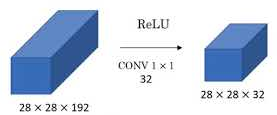

1x1 convolutions are used for changing number of channels or to add more nonlinearity to it.

## CIFAR-10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

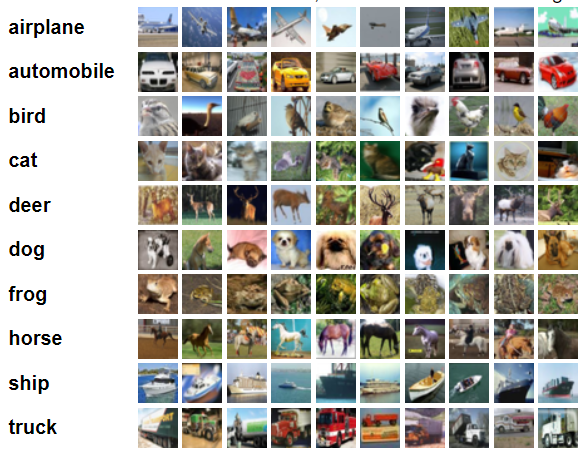

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

Load the data and normalize them.

In [ ]:
# load the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

Shape of the data.

In [ ]:
train_images.shape, train_labels.shape

In [ ]:
test_images.shape, test_labels.shape

In [ ]:
train_images[0]

In [ ]:
test_labels

Display data with labels.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Setting up the network architecture.

In [ ]:
# 32x32 image with 3 channels - RGB
input_layer = layers.Input(shape=(32, 32, 3))
# Convolution 2D, 32 filter with patches of size 3x3
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
# Maximum pooling with patches of size 2x2
x = layers.MaxPooling2D((2, 2))(x)
# Convolution 2D, 64 filter with patches of size 3x3
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
# Flatten conv2D output for processing in dense layers responsible for classification
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)
model = Model(inputs = input_layer, outputs = output_layer)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

### Accuracy

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

### Loss function

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

### Evaluate model

In [ ]:
result = model.evaluate(test_images,  test_labels)
print(f'accuracy: {result[1]*100:.2f}%')

## Display trained filters

In [ ]:
# how layers are stacked
layer = model.layers
layer

In [ ]:
filters, biases = model.layers[1].get_weights()
# (rows, cols, channels, filter count)
filters.shape

First Conv2D filters.

In [ ]:
filters, biases = model.layers[1].get_weights()
fig1=plt.figure(figsize=(8, 12))
columns = 4
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
plt.show()  

Second Conv2D filters.

In [ ]:
filters, biases = model.layers[3].get_weights()
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

Third Conv2D filters.

In [ ]:
filters, biases = model.layers[5].get_weights()
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

## Display image processed by filters

In [ ]:
# reformat model to get output from trained convolution layers
conv_layer_index = [1, 3, 5]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Source image from CIFAR.

In [ ]:
plt.imshow(train_images[7])

Expand image dimension for prediction.

In [ ]:
img = np.expand_dims(train_images[7], axis=0)

Make a prediction.

In [ ]:
feature_output = model_short.predict(img)

First layer feature maps.

In [ ]:
columns = 4
rows = 8
ftr = feature_output[0]
fig=plt.figure(figsize=(12, 12))
for i in range(1, columns*rows +1):
    fig =plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap='gray')
plt.show()

Second layer feature maps.

In [ ]:
columns = 8
rows = 8
ftr = feature_output[1]
fig=plt.figure(figsize=(12, 12))
for i in range(1, columns*rows +1):
    fig =plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap='gray')
plt.show()

Third layer feature maps.

In [ ]:
columns = 8
rows = 8
ftr = feature_output[2]
fig=plt.figure(figsize=(12, 12))
for i in range(1, columns*rows +1):
    fig =plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap='gray')
plt.show()